# 目录
+ KMeans聚类
+ 优化聚类中心个数
+ 评估聚类的准确性
+ 适合大数据集的MiniBatch KMeans
+ 用KMeans进行图像处理
+ 度量样本点之间的距离
+ 混合高斯模型
+ 用KMeans进行异常值探测
+ KNN回归

In [1]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# KMeans聚类
KMeans类

In [3]:
from sklearn.cluster import KMeans

In [4]:
# 创建聚类数据集
from sklearn.datasets import make_blobs
blobs, classes = make_blobs(500, centers=3)

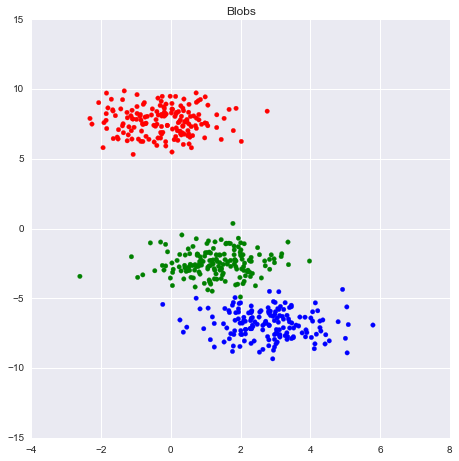

In [5]:
rgb = np.array(['r', 'g', 'b'])
f, ax = plt.subplots(figsize=(7.5, 7.5))
ax.scatter(blobs[:, 0], blobs[:, 1], color=rgb[classes])
ax.set_title("Blobs");

In [6]:
kmean = KMeans(n_clusters=3)
kmean.fit(blobs)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [7]:
kmean.cluster_centers_

array([[ 1.28351435, -2.50250013],
       [-0.22557765,  7.70144677],
       [ 2.8167872 , -6.85351153]])

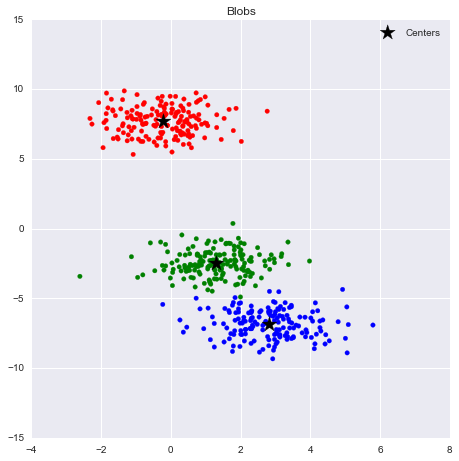

In [8]:
f, ax = plt.subplots(figsize=(7.5, 7.5))
ax.scatter(blobs[:, 0], blobs[:, 1], color=rgb[classes])
ax.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], marker='*', s=250, color='black', label='Centers') # 标示聚类中心
ax.set_title("Blobs")
ax.legend(loc='best');

In [9]:
kmean.labels_[:5] # labels_属性会给出每个样本点的预测标签

array([0, 1, 0, 1, 1])

In [10]:
classes[:5] # 与模拟数据集的classes对比，检查聚类的正确率（注意：聚类的标签仅仅用于区别不同的类，没有实际意义，所以同样的类，标签可能与classes不同）

array([1, 0, 1, 0, 0])

In [11]:
kmean.transform(blobs)[:5] # transform方法返回每个样本点与所有聚类中心的距离

array([[  1.70920759,  10.37299052,   4.68546013],
       [ 10.6873126 ,   1.13216914,  15.16182433],
       [  3.99863396,  11.37843754,   6.41681408],
       [ 11.16860528,   1.08704292,  15.67620281],
       [ 11.47114578,   1.28187149,  16.0516871 ]])

# 优化聚类中心个数

## 聚类好坏的衡量标准
silhouette_samples方法、silhouette_score方法

In [12]:
from sklearn import metrics

In [13]:
# 创建聚类数据集
from sklearn.datasets import make_blobs
blobs, classes = make_blobs(500, centers=3)

In [14]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(blobs)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [15]:
from sklearn import metrics

import numpy as np
silhouette_samples = metrics.silhouette_samples(blobs, kmean.labels_) # silhouette_samples方法，计算每个样本点的轮廓系数，取值为[-1,1]
np.column_stack((classes[:5], silhouette_samples[:5]))

array([[ 2.        ,  0.73312563],
       [ 2.        ,  0.79238622],
       [ 2.        ,  0.74886619],
       [ 2.        ,  0.69672848],
       [ 2.        ,  0.76028027]])

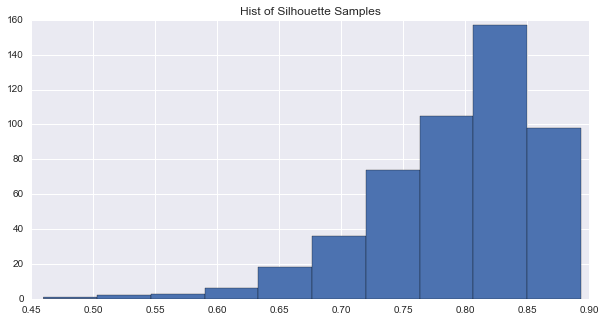

In [16]:
# 绘制轮廓系数的分布直方图
f, ax = plt.subplots(figsize=(10, 5))

ax.set_title("Hist of Silhouette Samples")
ax.hist(silhouette_samples); # 轮廓系数越靠近1，说明聚类效果越好

In [17]:
silhouette_samples.mean() # 用所有样本点的轮廓系数均值，来衡量聚类的整体效果

0.79497309519231296

In [18]:
metrics.silhouette_score(blobs, kmean.labels_) # silhouette_score方法，计算所有样本点轮廓系数的均值

0.79497309519231296

## 优化聚类中心个数

In [19]:
# 创建聚类数据集，真实聚类中心个数为10个
blobs, classes = make_blobs(500, centers=10)

In [20]:
sillhouette_avgs = []

# 取聚类中心个数2个到60个分别建模
for k in range(2, 60):
    kmean = KMeans(n_clusters=k).fit(blobs)
    
    sillhouette_avgs.append(metrics.silhouette_score(blobs, kmean.labels_))

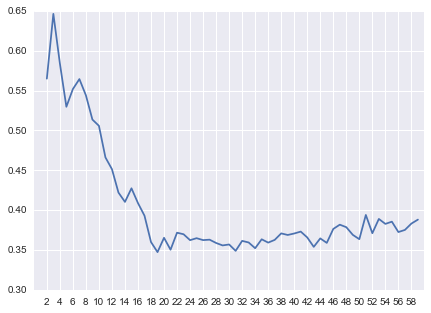

In [21]:
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(2, 60), sillhouette_avgs)
ax.set_xticks(range(2, 60, 2)); # 从图中判断出的最优的聚类中心个数，与真实情况下的10个不同，这反映了聚类问题的困境，我们很难得到准确的类别个数

# 评估聚类的准确性

In [22]:
from sklearn import cluster
from sklearn import datasets
blobs, ground_truth = datasets.make_blobs(1000, centers=3, cluster_std=2)

## 和分类问题一样，计算聚类后每个类别的正确率

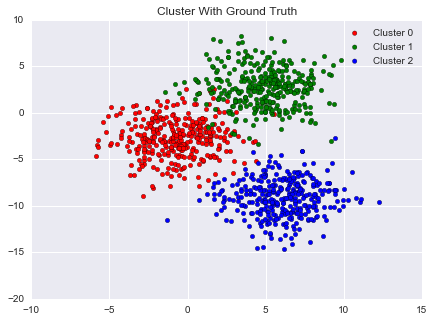

In [23]:
f, ax = plt.subplots(figsize=(7, 5))

colors = ['r', 'g', 'b']

for i in range(3):
    p = blobs[ground_truth == i]
    ax.scatter(p[:,0], p[:,1], c=colors[i], label="Cluster {}".format(i))
    
ax.set_title("Cluster With Ground Truth")
ax.legend();

In [24]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(blobs)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [25]:
kmeans.cluster_centers_

array([[-0.82631522, -2.75120461],
       [ 6.01749713, -9.05994855],
       [ 4.80134748,  2.7756678 ]])

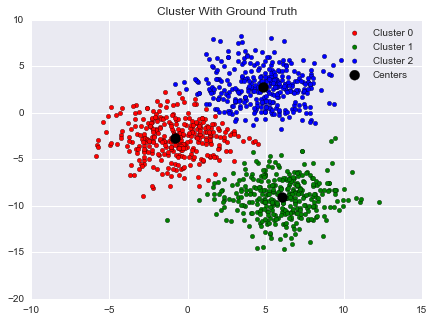

In [26]:
f, ax = plt.subplots(figsize=(7, 5))

colors = ['r', 'g', 'b']

for i in range(3):
    p = blobs[kmeans.labels_ == i]

    ax.scatter(p[:,0], p[:,1], c=colors[i], label="Cluster {}".format(i))
    
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, color='black', label='Centers')
ax.set_title("Cluster With Ground Truth")
ax.legend();

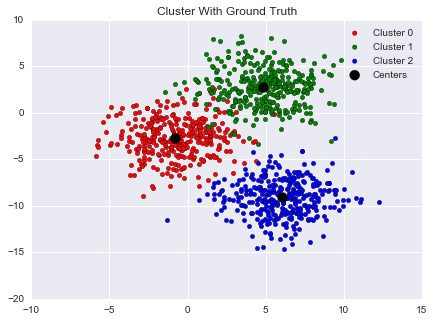

In [27]:
f, ax = plt.subplots(figsize=(7, 5))

colors = ['r', 'g', 'b']

for i in range(3):
    p = blobs[ground_truth == i]

    ax.scatter(p[:,0], p[:,1], c=colors[i], label="Cluster {}".format(i))
    
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, color='black', label='Centers')
ax.set_title("Cluster With Ground Truth")
ax.legend();

In [28]:
for i in range(3):
    print (kmeans.labels_ == ground_truth)[ground_truth == i].astype(int).mean() # 由于聚类标签和真实标签不同，所以这样算出的结果没有意义

0.955089820359
0.003003003003
0.0


In [29]:
new_ground_truth = ground_truth.copy() # 复制真实标签

In [30]:
new_ground_truth[ground_truth == 0] = 2 # 将真实标签的命名方式调整为和聚类标签一样
new_ground_truth[ground_truth == 2] = 0

In [31]:
for i in range(3):
    print (kmeans.labels_ == new_ground_truth)[ground_truth == i].astype(int).mean() # 计算聚类正确率

0.0359281437126
0.003003003003
0.0


## 互信息

In [32]:
from sklearn import metrics

In [33]:
metrics.mutual_info_score(ground_truth, kmeans.labels_) # 计算互信息，不用考虑真实标签与聚类标签是否对应

0.98167999897305847

In [34]:
metrics.normalized_mutual_info_score(ground_truth, kmeans.labels_) # 标准化互信息，除以sqrt(H(ground_truth) * H(kmeans.labels_))，将互信息调整到区间[0,1]

0.89359135888163777

In [35]:
metrics.adjusted_mutual_info_score(ground_truth, kmeans.labels_) # 调整互信息，根据聚类的个数来调整互信息

0.89336986439091659

## intertia
Inertia is the sum of squared difference between each point and it's assigned cluster. It is the metric that KMeans is minimizing. 

In [36]:
kmeans.inertia_ # 值越低越好，但并非是一个好的评判标准

7874.2831183061553

# 适合大数据集的MiniBatch KMeans
MiniBatchKMeans类

In [37]:
from sklearn.cluster import KMeans, MiniBatchKMeans

In [38]:
# 创建聚类大数据集
from sklearn.datasets import make_blobs
blobs, labels = make_blobs(int(1e6), 3) # 100万个样本，3个特征，3个类别

In [39]:
kmeans = KMeans(n_clusters=3)
minibatch = MiniBatchKMeans(n_clusters=3)

## 比较运行速度

In [40]:
%time kmeans.fit(blobs) # KMeans的运行时间

Wall time: 9.05 s


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [41]:
%time minibatch.fit(blobs) # MiniBatch KMeans的运行时间，MiniBatch KMeans的速度远比KMeans更快

Wall time: 1.6 s


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

## 比较聚类结果的差异

In [42]:
kmeans.cluster_centers_[0] # KMeans算出的第1个聚类中心

array([-2.74089705, -8.9203451 , -7.61562263])

In [43]:
minibatch.cluster_centers_[0] # MiniBatch KMeans算出的第1个聚类中心

array([-2.71766122, -8.94571028, -7.54682676])

In [44]:
# 计算KMeans和MiniBatch KMeans分别算出的第1个聚类中心的距离
from sklearn.metrics import pairwise
pairwise.pairwise_distances(kmeans.cluster_centers_[0].reshape(1, -1), minibatch.cluster_centers_[0].reshape(1, -1))

array([[ 0.07691663]])

In [45]:
np.diag(pairwise.pairwise_distances(kmeans.cluster_centers_, minibatch.cluster_centers_)) # 计算KMeans和MiniBatch KMeans分别算出的3个聚类中心的距离

array([ 0.07691663,  0.0469548 ,  0.0597697 ])

In [46]:
minibatch = MiniBatchKMeans(batch_size=len(blobs)) # batch_size参数控制batch的大小，将batch_size设置为数据集的大小，尝试运行
%time minibatch.fit(blobs) # 运行时间非常长，且不保证收敛于全局最优解

Wall time: 25.4 s


MiniBatchKMeans(batch_size=1000000, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

# 用KMeans进行图像处理

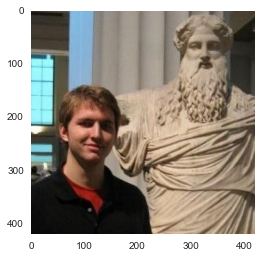

In [47]:
from scipy import ndimage
img = ndimage.imread("headshot.jpg") # 图像会被转化为3维数组，x、y代表高度、宽度，z代表每个像素点的RGB颜色
plt.grid(False)
plt.imshow(img); # 显示图像

In [48]:
img.shape # 420*420个像素点，每个像素点有3个RGB值

(420L, 420L, 3L)

In [49]:
x, y, z = img.shape
long_img = img.reshape(x*y, z)
long_img.shape # 将3维数组转化为2维数组，一维代表像素点，另一维代表RGB值

(176400L, 3L)

In [50]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=5)
k_means.fit(long_img)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [51]:
centers = k_means.cluster_centers_ # 5个聚类中心
centers

array([[ 194.70220024,  172.43788857,  149.8022608 ],
       [  86.43988414,   69.01084818,   54.18122199],
       [  24.73911943,   20.50022141,   16.23146508],
       [ 149.59225928,  132.54941043,  115.69980025],
       [ 142.57175945,  206.11787575,  226.04268343]])

In [52]:
labels = k_means.labels_ # 每个样本点的标签
labels[:5]

array([1, 1, 1, 1, 1])

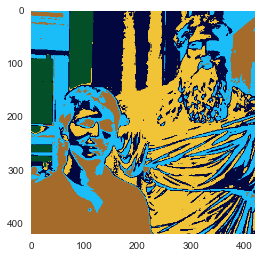

In [53]:
plt.imshow(centers[labels].reshape(x, y, z)) # 图像被模糊化，只有5种颜色
plt.grid(False);

# 度量样本点之间的距离
metrics.pairwise类

In [54]:
from sklearn.metrics import pairwise

In [55]:
# 创建聚类数据集
from sklearn.datasets import make_blobs
points, labels = make_blobs()

## pairwise_distances函数

### 欧氏距离  
$$d(x, y) = \sqrt{\sum_i (x_i - y_i)^2} $$

In [56]:
# 计算两个样本点欧氏距离的函数
def euclid_distances(x, y):
    return np.power(np.power(x - y, 2).sum(), .5)

In [57]:
euclid_distances(points[0], points[1]) # 与下面pairwise_distances计算出的欧氏距离进行对比

22.268649477370261

In [58]:
distances = pairwise.pairwise_distances(points) # distances是N*N矩阵，第ij个元素代表第i和第j个样本点的距离

In [59]:
np.diag(distances) [:5] # 对角线元素都为0

array([ 0.,  0.,  0.,  0.,  0.])

In [60]:
distances[0][:5] # 第1个样本点与其他样本点的距离

array([  0.        ,  22.26864948,   1.9521469 ,   4.21649031,   5.17544761])

In [61]:
ranks = np.argsort(distances[0]) # 得到每个样本点与第1个样本点的距离排序后的名次，从近到远
ranks[:5]

array([ 0, 93, 85, 66, 25], dtype=int64)

In [62]:
points[ranks][:5] # 得到排序后的样本点，从近到远

array([[  4.54544163,  10.256699  ],
       [  4.1052922 ,  10.47174699],
       [  4.47955325,   9.67706499],
       [  3.81849478,  10.01599409],
       [  3.71600923,  10.21486707]])

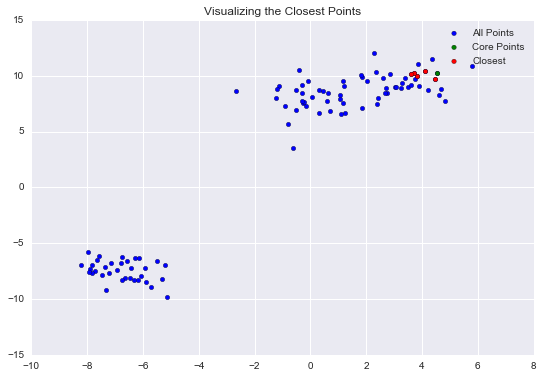

In [63]:
f, ax = plt.subplots(figsize=(9, 6))

five_closest = points[ranks][:6]

ax.set_title("Visualizing the Closest Points")
ax.scatter(points[:, 0], points[:, 1], label='All Points')
ax.scatter(points[0, 0], points[0, 1], c='g', label='Core Points')
ax.scatter(five_closest[1:, 0], five_closest[1:, 1], c='r', label='Closest')
ax.legend();

### 其他距离度量方式
+ cityblock
+ cosine
+ euclidean
+ l1
+ l2
+ manhattan
+ 其他SciPy中提供的距离度量方式

In [64]:
# cityblock
# If we were standing on a grid at the origin, and the lines were the streets, how far will we have to travel to get to point (5, 5)?
pairwise.pairwise_distances([[0, 0], [5, 5]], metric='cityblock')[0]

array([  0.,  10.])

In [65]:
X = np.random.binomial(1, .5, size=(2, 4)).astype(np.bool)
X

array([[False,  True, False, False],
       [ True,  True, False,  True]], dtype=bool)

In [66]:
# 汉明距离
pairwise.pairwise_distances(X, metric='hamming')

array([[ 0. ,  0.5],
       [ 0.5,  0. ]])

# 混合高斯模型
GMM类

## 理论介绍

### 一维的情况

In [67]:
# 创建聚类内均值不同、协方差相同的数据集
N = 1000

in_m = 72
in_w = 66

s_m = 2
s_w = s_m

m = np.random.normal(in_m, s_m, N)
w = np.random.normal(in_w, s_w, N)

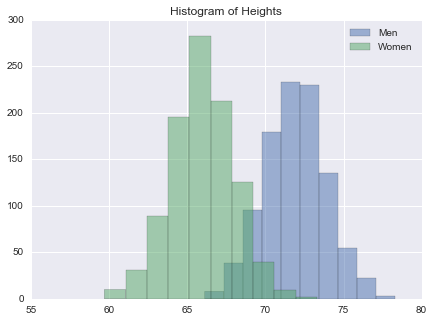

In [68]:
# 绘制不同类的样本分布直方图
f, ax = plt.subplots(figsize=(7, 5))

ax.set_title("Histogram of Heights")
ax.hist(m, alpha=.5, label="Men");
ax.hist(w, alpha=.5, label="Women");

ax.legend();

In [69]:
# 切分训练集和测试集，在训练集上拟合分布，在测试集上进行预测
random_sample = np.random.choice([True, False], size=m.size)

m_test = m[random_sample]
m_train = m[~random_sample]

w_test = w[random_sample]
w_train = w[~random_sample]

In [70]:
# 拟合分布
from scipy import stats

m_pdf = stats.norm(m_train.mean(), m_train.std())
w_pdf = stats.norm(w_train.mean(), w_train.std())

In [71]:
m_pdf.pdf(m[0])

0.15589542637615561

In [72]:
w_pdf.pdf(m[0]) # 分别计算样本点从两个分布中产生的概率

0.013730369829194894

In [73]:
guesses_m = np.ones_like(m_test) # 取出测试集中所有男性样本，赋值为1

guesses_m[m_pdf.pdf(m_test) < w_pdf.pdf(m_test)] = 0 # 将错分的样本点（即预测为女性概率大于男性概率）赋值为0

In [74]:
guesses_m.mean() # 计算分类为男性的正确率

0.94632206759443338

In [75]:
guesses_w = np.ones_like(w_test)

guesses_w[m_pdf.pdf(w_test) > w_pdf.pdf(w_test)] = 0

guesses_w.mean() # 计算分类为女性的正确率

0.92842942345924451

In [76]:
# 创建聚类内均值不同、协方差也不同的数据集
s_m = 1
s_w = 4

m = np.random.normal(in_m, s_m, N)
w = np.random.normal(in_w, s_w, N)

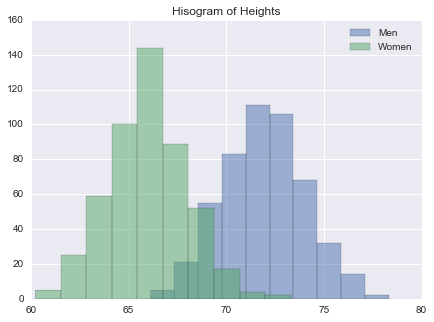

In [77]:
# 绘制不同类的样本分布直方图
f, ax = plt.subplots(figsize=(7, 5))

ax.set_title("Hisogram of Heights")
ax.hist(m_train, alpha=.5, label="Men");
ax.hist(w_train, alpha=.5, label="Women");

ax.legend();

In [78]:
# 切分训练集和测试集，在训练集上拟合分布，在测试集上进行预测
m_test = m[random_sample]
m_train = m[~random_sample]

w_test = w[random_sample]
w_train = w[~random_sample]

In [79]:
# 拟合分布
m_pdf = stats.norm(m_train.mean(), m_train.std())
w_pdf = stats.norm(w_train.mean(), w_train.std())

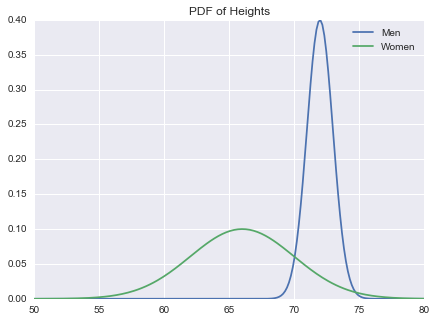

In [80]:
# 绘制拟合后的分布概率密度图
f, ax = plt.subplots(figsize=(7, 5))

ax.set_title("PDF of Heights")
ax.plot(np.linspace(50, 80, 200), m_pdf.pdf(np.linspace(50, 80, 200)), label='Men')
ax.plot(np.linspace(50, 80, 200), w_pdf.pdf(np.linspace(50, 80, 200)), label='Women')

ax.legend();

### 多维的情况

In [81]:
# 多维高斯分布
class_A = np.random.normal(0, 1, size=(100, 2))
class_B = np.random.normal(4, 1.5, size=(100, 2))

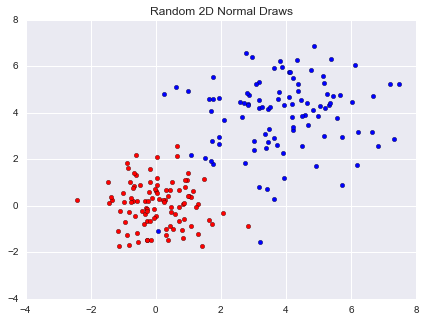

In [82]:
# 由2个多维高斯分布，分别产生的2类样本点
f, ax = plt.subplots(figsize=(7, 5))

ax.scatter(class_A[:,0], class_A[:,1], label='A', c='r')
ax.scatter(class_B[:,0], class_B[:,1], label='B')

ax.set_title("Random 2D Normal Draws");

## 操作方法
GMM类

In [83]:
from sklearn.mixture import GMM

In [84]:
gmm = GMM(n_components=2) # 设置有2类
X = np.row_stack((class_A, class_B))
y = np.hstack((np.ones(100), np.zeros(100)))

In [85]:
# 取出训练集
train = np.random.choice([True, False], 200)

In [86]:
# 在训练集上训练模型
gmm.fit(X[train])

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

In [87]:
# 预测
gmm.predict(X[~train])[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [88]:
# 获取每个样本点属于不同类别的log probabilities
gmm.score_samples(X[~train][:1]) # 第1类的概率大于第0类，因此分到第1类，与上面的结果吻合

(array([-3.62185226]), array([[ 0.99459722,  0.00540278]]))

# 用KMeans进行异常值探测
KMeans类

In [89]:
from sklearn.cluster import KMeans

In [90]:
# 创建有100个样本的聚类数据集，之后会找出5个距离聚类中心最远的样本点，这些样本点是潜在的异常值点
from sklearn.datasets import make_blobs
X, labels = make_blobs(100, centers=1)

## 异常值探测

In [91]:
kmeans = KMeans(n_clusters=1) # 必须设置为只有1个类别（也可以用SVM进行异常值探测，同样设置为只有1个类别）
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=1, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [92]:
kmeans.cluster_centers_ # 聚类中心

array([[ 4.55662943,  9.70985948]])

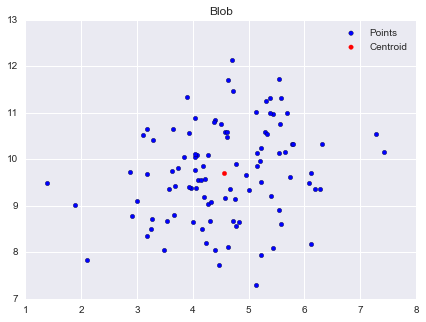

In [93]:
# 绘制聚类数据集
f, ax = plt.subplots(figsize=(7, 5))

ax.set_title("Blob")
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], label='Centroid', color='r')
ax.legend();

In [94]:
distances = kmeans.transform(X) # transform方法，会返回每个样本点与所有聚类中心的距离（N个样本点，k个聚类中心，则返回N*k的矩阵）

# argsort返回向量中每个元素升序排名的位次（rank），用返回值做索引，可以起到升序排列的作用
# 索引[::-1]则变成降序，从而找出距离最远的5个样本点
# np.ravel方法将2维数组（矩阵）扁平化为1维数组（向量），默认按行排列
sorted_idx = np.argsort(distances.ravel())[::-1][:5] # 距离最远的5个样本点的索引

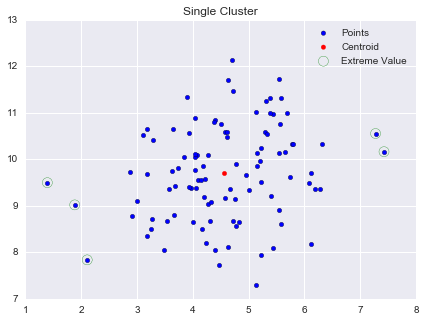

In [95]:
# 找出距离最远的5个样本点
f, ax = plt.subplots(figsize=(7, 5))

ax.set_title("Single Cluster")
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1], label='Extreme Value', edgecolors='g', facecolors='none', s=100)
ax.legend(loc='best');

## 删除异常值

In [96]:
new_X = np.delete(X, sorted_idx, axis=0) # np.delete函数

In [97]:
new_kmeans = KMeans(n_clusters=1)
new_kmeans.fit(new_X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=1, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

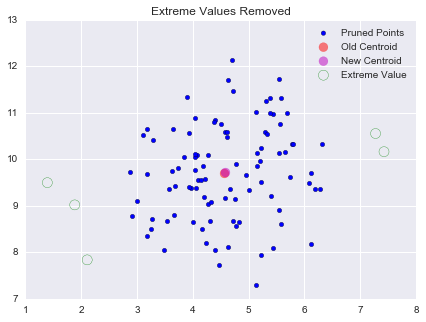

In [98]:
# 绘制被删除的异常值、删除异常值前后的聚类中心
f, ax = plt.subplots(figsize=(7, 5))

ax.set_title("Extreme Values Removed")
ax.scatter(new_X[:, 0], new_X[:, 1], label='Pruned Points')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], label='Old Centroid', color='r', s=80, alpha=.5)
ax.scatter(new_kmeans.cluster_centers_[:, 0], new_kmeans.cluster_centers_[:, 1], label='New Centroid', color='m', s=80, alpha=.5)
ax.scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1], label='Extreme Value', edgecolors='g', facecolors='none', s=100)
ax.legend(loc='best'); # 仅仅删除5个最远样本点，聚类中心的变化不会太大，删除异常值的过程可以一直进行下去，直到对数据集满意为止

## 从概率的角度看待距离

In [99]:
from scipy import stats
emp_dist = stats.multivariate_normal(kmeans.cluster_centers_.ravel()) # 以聚类中心为中心，生成二元正态分布

In [100]:
lowest_prob_idx = np.argsort(emp_dist.pdf(X))[:5] # 找出概率最低的5个样本点

In [101]:
np.all(X[sorted_idx] == X[lowest_prob_idx]) # 探测异常值，找出距离最远的样本点，等同于找出概率最低的样本点

True

# KNN回归
KNeighborsRegressor类

In [102]:
from sklearn.neighbors import KNeighborsRegressor 

In [103]:
# 载入iris数据集
from sklearn import datasets
iris = datasets.load_iris()
iris.feature_names # iris数据集有4个特征

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [104]:
X = iris.data[:, :2] # 用第1、2个特征来预测第4个特征
y = iris.data[:, 3]

## 普通线性回归

In [105]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
print "The MSE is: {:.2}".format(np.power(y - lr.predict(X), 2).mean()) # 普通线性回归的MSE

The MSE is: 0.15


## KNN回归

In [107]:
from sklearn.neighbors import KNeighborsRegressor 

In [108]:
knnr = KNeighborsRegressor(n_neighbors=10) # 选取距离最近的10个样本点进行回归
knnr.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [109]:
print "The MSE is: {:.2}".format(np.power(y - knnr.predict(X), 2).mean()) # KNN回归的MSE，相比普通线性回归有所下降

The MSE is: 0.069


## 普通线性回归与KNN回归的对比

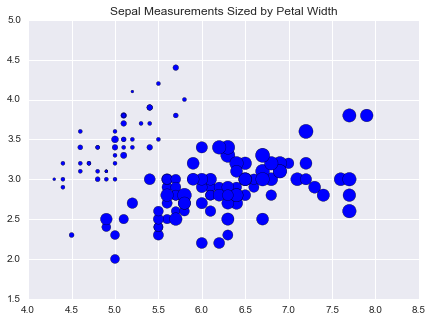

In [110]:
# 散点的大小反映了花瓣宽度（即y）真实值的大小
f, ax = plt.subplots(figsize=(7, 5))

ax.set_title("Sepal Measurements Sized by Petal Width")
ax.scatter(X[:, 0], X[:, 1], s=y*80);

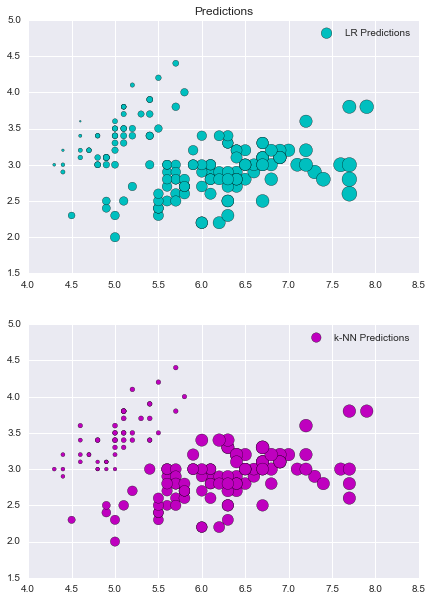

In [111]:
# 散点的大小反映了花瓣宽度预测值（普通线性回归和KNN回归）的大小
f, ax = plt.subplots(nrows=2, figsize=(7, 10))

ax[0].set_title("Predictions")

ax[0].scatter(X[:, 0], X[:, 1], s=lr.predict(X)*80, label='LR Predictions', color='c', edgecolors='black')
ax[1].scatter(X[:, 0], X[:, 1], s=knnr.predict(X)*80, label='k-NN Predictions', color='m', edgecolors='black')

ax[0].legend()
ax[1].legend();

In [112]:
setosa_idx = np.where(iris.target_names=='setosa')
setosa_mask = iris.target == setosa_idx[0]
y[setosa_mask][:5] # y[setosa_mask]是所有'setosa'种类鸢尾花的花瓣宽度

array([ 0.2,  0.2,  0.2,  0.2,  0.2])

In [113]:
knnr.predict(X)[setosa_mask][:5]

array([ 0.28,  0.17,  0.21,  0.2 ,  0.31])

In [114]:
lr.predict(X)[setosa_mask][:5] # 普通线性回归会高估'setosa'种类鸢尾花的花瓣宽度（setosa是花瓣宽度较小的哪一类鸢尾花）

array([ 0.44636645,  0.53893889,  0.29846368,  0.27338255,  0.32612885])

# KNN回归的原理

In [115]:
example_point = X[0] # 对单个样本点的花瓣宽度进行预测

In [116]:
# 找出距离该样本点最近的10个样本点
from sklearn.metrics import pairwise
distances_to_example = pairwise.pairwise_distances(X)[0]
ten_closest_points = X[np.argsort(distances_to_example)][:10]

In [117]:
# KNN回归的结果就是对这10个样本点的花瓣宽度取均值
ten_closest_y = y[np.argsort(distances_to_example)][:10]
ten_closest_y.mean()

0.28000000000000003